# Reading and Understanding Data
## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

## Loading Dataset
We have used the [Rice Seed Dataset from Kaggle](https://www.kaggle.com/seymasa/rice-dataset-gonenjasmine), which was extracted from two kinds of rice (Gonen, Jasmine).

|                          |        |
|--------------------------|:------:|
| DataSet Type  | Continuous |
| Associated Task  | Classification |



In [3]:
df=pd.read_csv("Rice-Gonen andJasmine.csv")

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

df.drop('id',axis = 1,inplace = True)
df.sample(5)

Number of instances = 18185
Number of attributes = 12


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
6707,5845,151.641327,50.079527,0.943894,5971,86.267521,0.817254,336.810,0.647477,3.028010,jasmine
15518,7121,143.606813,63.791652,0.895922,7230,95.219424,0.776978,337.423,0.785962,2.251185,Gonen
13210,8058,150.321918,69.130780,0.887979,8307,101.290494,0.761698,360.976,0.777106,2.174457,Gonen
14225,6927,140.548717,63.683244,0.891457,7072,93.913419,0.791024,336.033,0.770888,2.206997,Gonen
12593,9368,160.912634,74.763402,0.885510,9618,109.214047,0.642965,388.203,0.781158,2.152291,Gonen


## Data Types

In [4]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class               object
dtype: object

All the attributes are continuous real valued while the class is binary (categorical).

## Summary Statistics
We will display the summary for all the attributes simultaneously in a table using the **describe()** function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

In [5]:
df.describe(include='all')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jasmine
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9985
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,NaN
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,NaN
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,NaN
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,NaN
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,NaN
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,NaN


# Data Quality
## Missing Values
We will count the number of missing values in each column of the data.

In [6]:
print('Number of missing values:')
df.isnull().sum()

Number of missing values:


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

We observe that no column contains any null or missing values.

## Outliers
We will draw a boxplot to identify the columns in the table that contain outliers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

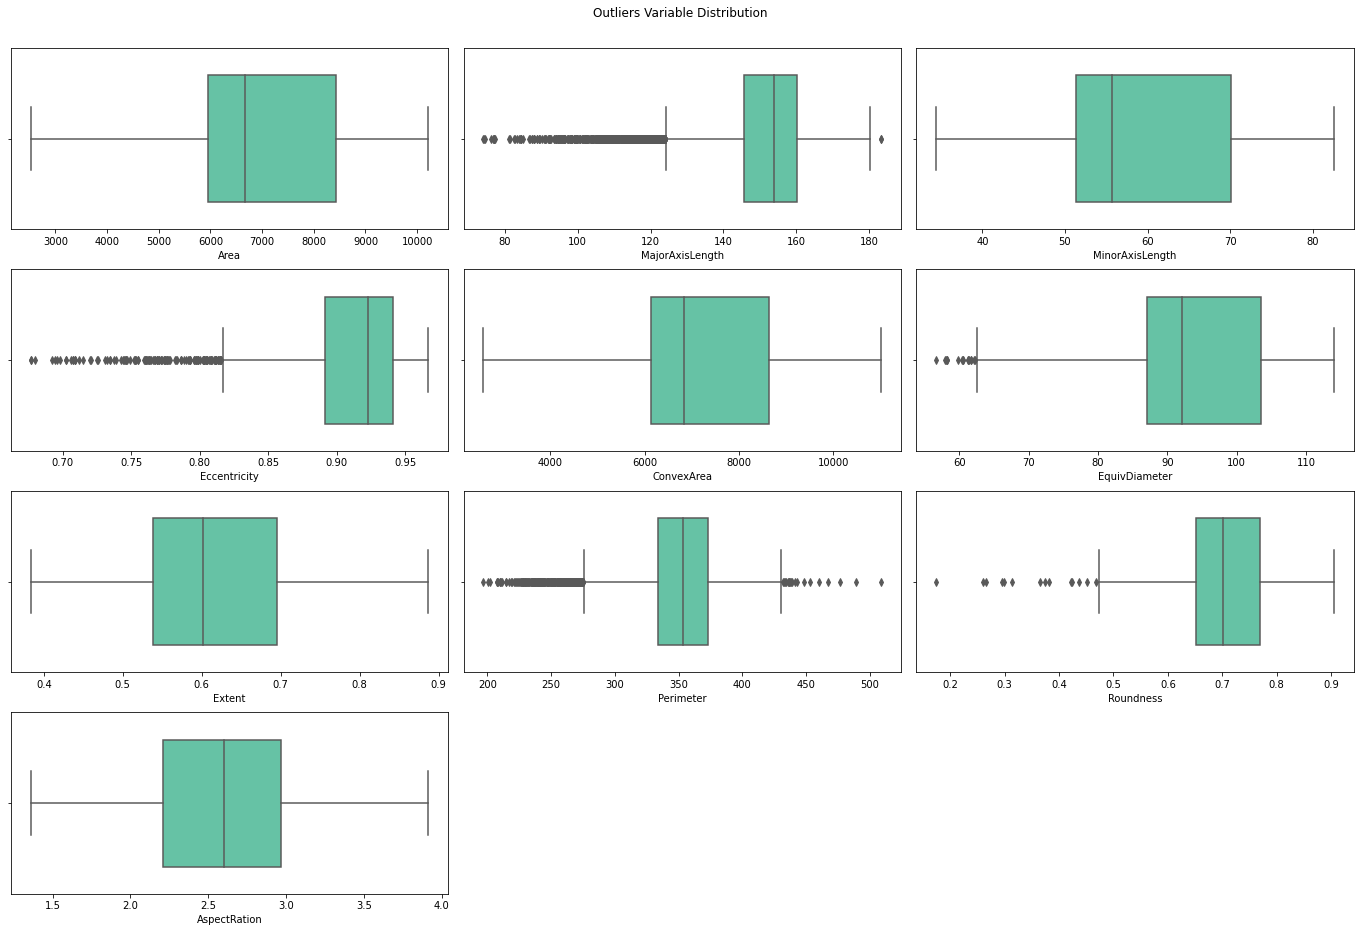

In [ ]:
attributes =['Area','MajorAxisLength',	'MinorAxisLength',	'Eccentricity',	'ConvexArea',	'EquivDiameter',	'Extent',	'Perimeter',	'Roundness',	'AspectRation']

plt.figure(figsize = (19, 19))
for i,j in zip(attributes,range(10)):
  plt.subplot(6, 3, j+1)
  sns.boxplot(df[i], palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.suptitle('Outliers Variable Distribution')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

The boxplots suggest that the attributes: MajorAxisLength,	Eccentricity,	EquivDiameter,	Perimeter and	Roundness contain abnormally high values. So, we will be removing (statistical) outliers for these attributes.

As we know boxplot uses interquartile range to plot outliers and data where IQR is the difference between 1st and 3rd quartile so we use IQR to remove outliers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

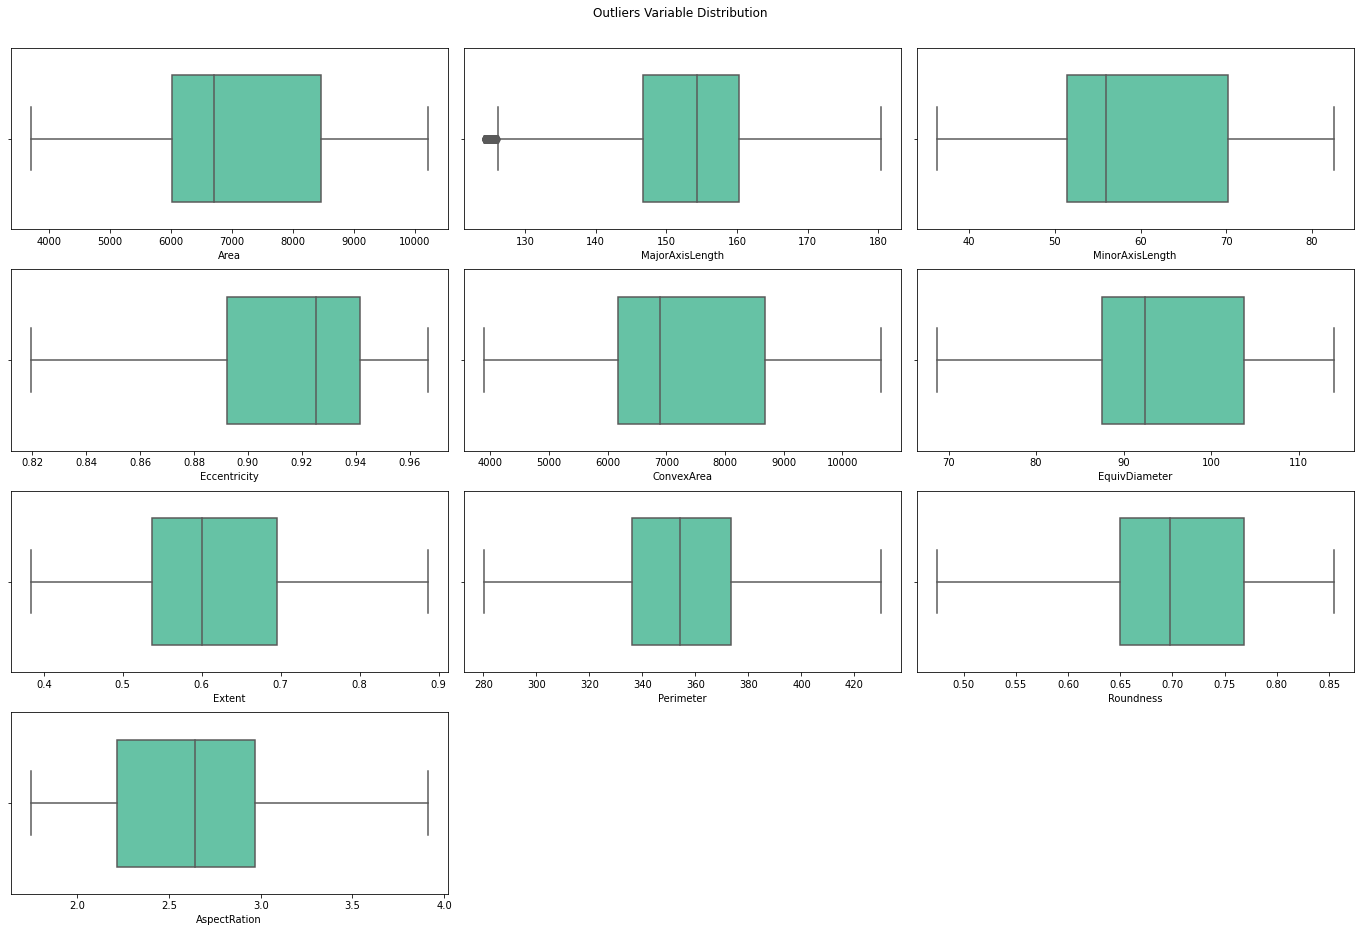

In [ ]:
outliers=['MajorAxisLength',	'Eccentricity',	'EquivDiameter',	'Perimeter',	'Roundness']
for i in outliers: 
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]
  
attributes = df.columns
plt.figure(figsize = (19, 19))
for i,j in zip(attributes,range(10)):
  plt.subplot(6, 3, j+1)
  sns.boxplot(df[i], palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.suptitle('Outliers Variable Distribution')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Duplicate Data
We first check for duplicate instances in the dataset.
The **duplicated()** function returns a Boolean array that indicates whether each row is a duplicate of a previous row in the table.

In [ ]:
print('Number of duplicate rows: %d' % (df.duplicated().sum()))

Number of duplicate rows: 0


The results suggest that there are **no duplicate rows** in the online retail dataset. So, we don't need to remove any row.

## Class Imbalance Analysis

jasmine    9542
Gonen      8055
Name: Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


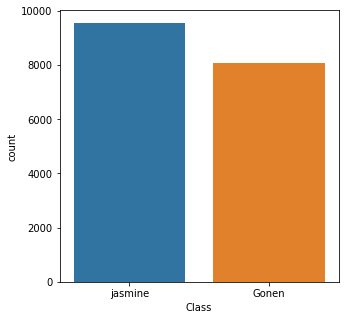

In [ ]:
print(df.Class.value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['Class'],label="Count")
plt.show()

We can say that data is balance as there is not much difference in the number of instances of both the classes.

# Discretization
Since all the attributes are continous and our class is binary, we will use **supervised discretization** in continuous attribute to calculate correlation with the class.

## Decision Tree Formation
For supervised discretization, we will use target class infomation to form bins with the help of decision trees. But, first, we have to find some optimal parameters, for example, depth of the tree.

In [ ]:
le = LabelEncoder()
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])

X=df.iloc[:,0:10]
y=df.iloc[:,10:]

In the next code block, the list *ls_score* will store the area under the ROC curve while *std_score* will store the std of the area under ROC for different depths of the tree. 

> More the area under ROC near to 1, better is the depth.



In [ ]:
for col in X.columns:
  print(col)
  ls_score = []
  std_score = []
  for depth in [1,2,3,4,5]:
    tree_model = DecisionTreeClassifier(max_depth=depth)    
    scores = cross_val_score(tree_model, X[col].to_frame(),y, cv=3, scoring='roc_auc')   
    ls_score.append(np.mean(scores))
    std_score.append(np.std(scores))
  temp = pd.concat([pd.Series([1,2,3,4,5]), pd.Series(ls_score), pd.Series(std_score)], axis=1)
  temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
  print(temp)
  print()


Area
   depth  roc_auc_mean  roc_auc_std
0      1      0.922883     0.012726
1      2      0.956602     0.009529
2      3      0.969299     0.006101
3      4      0.971174     0.006235
4      5      0.971108     0.006076

MajorAxisLength
   depth  roc_auc_mean  roc_auc_std
0      1      0.550149     0.046627
1      2      0.543897     0.037372
2      3      0.549677     0.038745
3      4      0.546077     0.036259
4      5      0.542289     0.034636

MinorAxisLength
   depth  roc_auc_mean  roc_auc_std
0      1      0.968507     0.020220
1      2      0.975618     0.017313
2      3      0.979997     0.014526
3      4      0.981060     0.014898
4      5      0.979838     0.017158

Eccentricity
   depth  roc_auc_mean  roc_auc_std
0      1      0.671411     0.232351
1      2      0.671411     0.232351
2      3      0.671411     0.232351
3      4      0.671411     0.232351
4      5      0.393243     0.161046

ConvexArea
   depth  roc_auc_mean  roc_auc_std
0      1      0.920399     0.013102

From the above result, we select optimal depth for every attributes as follows-
* Area: 4
* MajorAxisLength: 3
* MinorAxisLength: 4
* Ecentricity: 2
* ConvexArea: 4
* EquivDiameter: 4
* Extent: 4
* Perimeter: 4
* Roundness: 4
* AspectRatio: 2

In [ ]:
discrete = X.copy()
depth=[4,3,4,2,4,4,4,4,4,2]
for col,dep in zip(X.columns,depth):
  tree = DecisionTreeClassifier(max_depth=dep)
  tree.fit(X[col].to_frame(), y)
  discrete[col+'_tree']=tree.predict_proba(X[col].to_frame())[:,1]
discrete.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Area_tree,MajorAxisLength_tree,MinorAxisLength_tree,Eccentricity_tree,ConvexArea_tree,EquivDiameter_tree,Extent_tree,Perimeter_tree,Roundness_tree,AspectRation_tree
158,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,0.909200,0.619983,0.011364,0.011089,0.902024,0.909200,0.412373,0.880906,0.006036,0.011089
186,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,0.632613,0.619983,0.000138,0.011089,0.667575,0.632613,0.293858,0.782841,0.006036,0.011089
207,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089
218,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089
227,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,0.961328,0.619983,0.158730,0.011089,0.954493,0.961328,0.412373,0.880906,0.006036,0.011089


## Binning

In [ ]:
for col in X.columns:
  print('FOR '+col+' BINNING IS ')
  a=pd.concat([discrete.groupby([col+'_tree'])[col].min(),discrete.groupby([col+"_tree"])[col].max()], axis=1)
  print(a)
  print()

FOR Area BINNING IS 
           Area   Area
Area_tree             
0.000000   7457  10210
0.187050   7380   7455
0.284810   7294   7378
0.404692   7137   7292
0.533040   7051   7136
0.632613   6898   7050
0.690411   6809   6897
0.765432   6722   6808
0.853264   6424   6721
0.909200   6181   6423
0.961328   5671   6180
0.998026   3698   5670
1.000000   7293   7293

FOR MajorAxisLength BINNING IS 
                      MajorAxisLength  MajorAxisLength
MajorAxisLength_tree                                  
0.463942                   155.948858       172.314927
0.527778                   152.683979       155.943075
0.577465                   149.793990       152.662338
0.619983                   124.110890       147.124623
0.652482                   172.334907       180.332508
0.668841                   147.125145       149.790363
1.000000                   152.663987       155.948219

FOR MinorAxisLength BINNING IS 
                      MinorAxisLength  MinorAxisLength
MinorAxisLength_tr

In [ ]:
discrete=discrete.iloc[:,10:]
discrete["Class"]=y
discrete.head()


,Area_tree,MajorAxisLength_tree,MinorAxisLength_tree,Eccentricity_tree,ConvexArea_tree,EquivDiameter_tree,Extent_tree,Perimeter_tree,Roundness_tree,AspectRation_tree,Class
158,0.909200,0.619983,0.011364,0.011089,0.902024,0.909200,0.412373,0.880906,0.006036,0.011089,1
186,0.632613,0.619983,0.000138,0.011089,0.667575,0.632613,0.293858,0.782841,0.006036,0.011089,1
207,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089,1
218,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089,1
227,0.961328,0.619983,0.158730,0.011089,0.954493,0.961328,0.412373,0.880906,0.006036,0.011089,1


# Dimension Reduction
We will now compute the correlation between pairs of attributes and between attribute and class and plot them in a heat map for visualization which will help in dimension reduction.

since our data is now in the form of bins so for finding correlation between the class and the attributes we will use Cramér's V method which is based on the chi square measure whose value varies from 0 to 1 as weak association and strong association respectively we have printed only those attribute whose association value is greater than 0.9 as strong association

In [ ]:
def cramers(data1, data2):
    confusion_matrix = pd.crosstab(data1,data2)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col in discrete.columns:
  if col!='Class':
    association=cramers(discrete[col],discrete.Class)
    if association >= 0.9 or association <= -0.9:
      print("Correlation between Class and "+col+" is: "+str(association))
      print()

Correlation between Class and MinorAxisLength_tree is: 0.9775749684647029

Correlation between Class and Eccentricity_tree is: 0.9653243040870586

Correlation between Class and Roundness_tree is: 0.9479493914135833

Correlation between Class and AspectRation_tree is: 0.9653243040870586



We see that the attributes MinorAxisLength, Ecentricity, Roundness and AspectRation are strongly associated with the class and thus are most interesting.


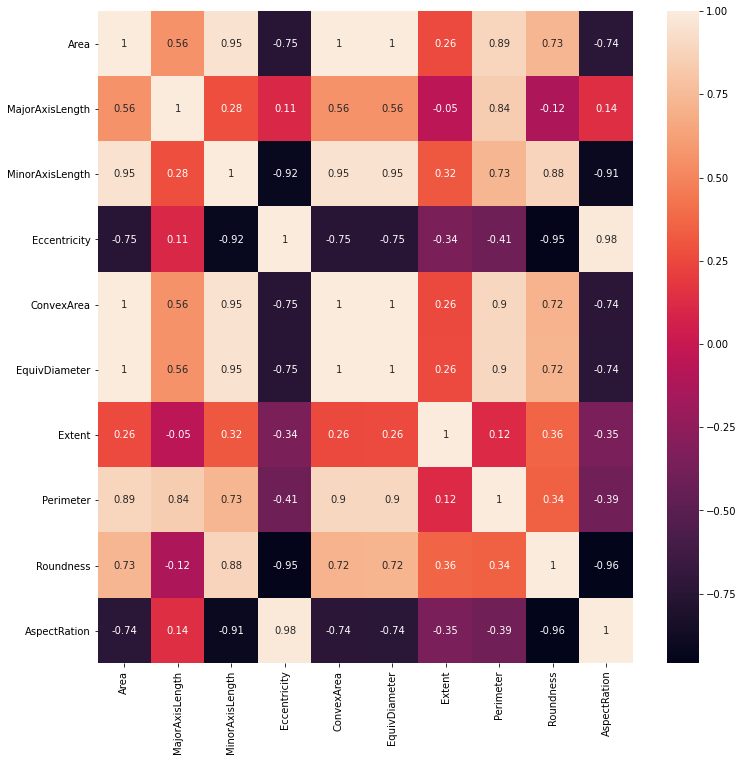

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(X.corr(),annot=True)
plt.show()

From the coorelation heatmap, we make the following observations:

* MinorAxisLength is highly correlated to Area (0.95), ConvexArea (0.95), EquivDiameter (0.95), Ecentricity (-0.92), AspectRation (-0.91) and Class (0.977).
* Ecentricity is highly correlated to MinorAxisLength(-0.92), Roundness(-0.95), AspectRation (0.98) and Class (0.968).
* Roundness is highly correlated to Ecentricity (-0.95), AspectRation (-0.96) and Class (0.94).
* AspectRation is highly correlated to MinorAxisLength (-0.91), Ecentricity (0.98), Roundness (-0.96) and Class (0.965).

Based on these findings, we will go with MinorAxisLength, Ecentricity, Extent and Perimeter as our attributes.

In [ ]:
columns = np.full((X.corr().shape[0],), False, dtype=bool)
columns[2]=True
columns[3]=True
columns[6]=True
columns[7]=True
selected_columns = X.columns[columns]
X = X[selected_columns]
X.head()


,MinorAxisLength,Eccentricity,Extent,Perimeter
158,63.762307,0.870549,0.662234,314.656
186,65.738475,0.876009,0.594437,338.782
207,59.626250,0.880040,0.623491,307.304
218,59.843292,0.882050,0.610352,309.264
227,60.416315,0.883736,0.661375,308.106


# Data Transformation
In this section, we will try to make the distribution of continuous numerical data as Normal (Gaussian).
We will first plot the data to visualize the type of distribution.

We will be checking their normality using the **Kurtosis** value and plotting the graph for visualization. Kurtosis can be measures by two types, one is by taking **fisher=true** in which case, normality is when **kurtosis = 0**.  Another type of measuring kurtosis is by taking **fisher=false**, where Pearson definition is used and for normality is achieved for **kurtosis = 3**.

kurtosis value for MinorAxisLength is: 1.56


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kurtosis value for Eccentricity is: 1.84
kurtosis value for Extent is: 2.14
kurtosis value for Perimeter is: 2.55


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

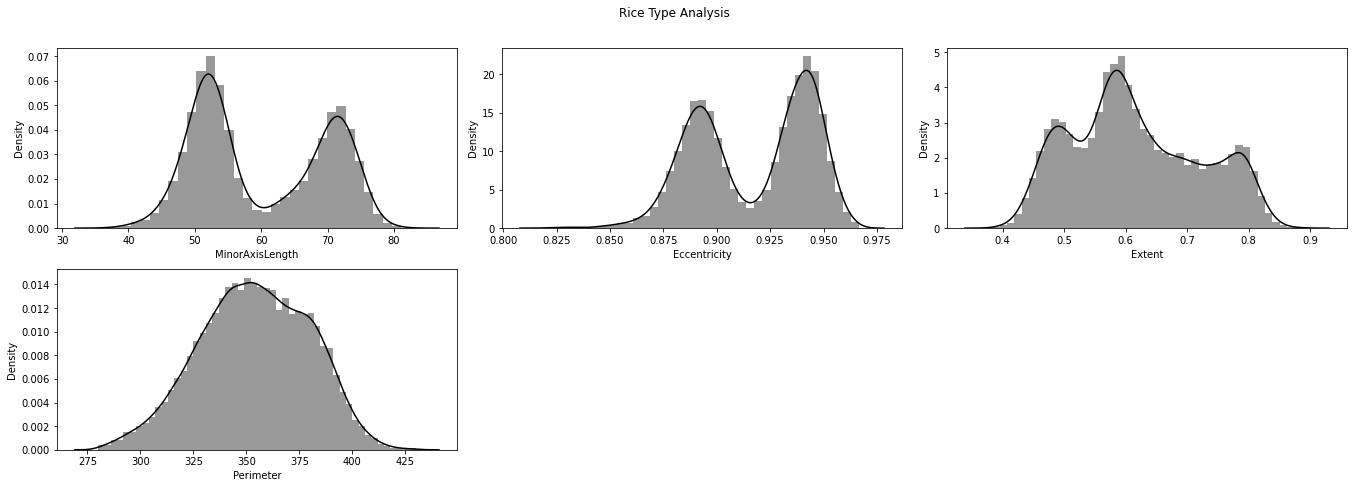

In [ ]:
plt.figure(figsize = (19, 19))
j = 0
for i in X.columns:
  print("kurtosis value for "+i+" is: %0.2f"%(st.kurtosis(X[i],fisher=False)))
  plt.subplot(6, 3, j+1)
  sns.distplot(X[i],color="black")
  j += 1
plt.suptitle('Rice Type Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Applying 1/x transformation on Perimeter Attribute





Kurtosis value for Perimeter after transformation is: 2.93


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


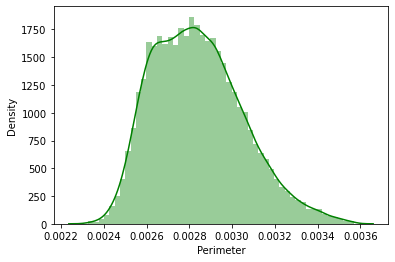

In [ ]:
X["Perimeter"]=X["Perimeter"].transform(func = lambda x : 1/x)
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Perimeter"],fisher=False)))
sns.distplot(X["Perimeter"],color="green")
plt.show()

## Transforming MinorAxisLength Attribute

Kurtosis value for Perimeter after transformation is: 2.96


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


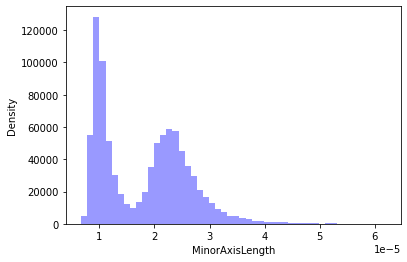

In [ ]:
X["MinorAxisLength"]=X["MinorAxisLength"].transform(func = lambda x : 1/np.power(x,2.7))
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["MinorAxisLength"],fisher=False)))
sns.distplot(X["MinorAxisLength"],color="blue")
plt.show()


## Transforming Extent Attribute

Kurtosis value for Perimeter after transformation is: 3.00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


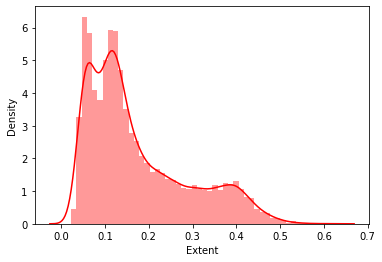

In [ ]:
X["Extent"]=X["Extent"].transform(func = lambda x : np.power(x,3.95))
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Extent"],fisher=False)))
sns.distplot(X["Extent"],color="red")
plt.show()

## Transforming Eccentricity Attribute

Kurtosis value for Perimeter after transformation is: 3.18


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


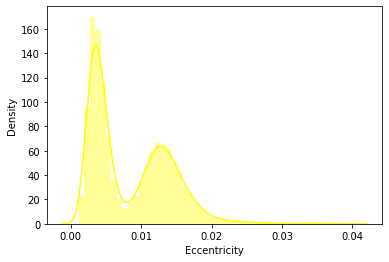

In [ ]:
X["Eccentricity"]=X["Eccentricity"].transform(func = lambda x : np.power(np.log(x),2))
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Eccentricity"],fisher=False)))
sns.distplot(X["Eccentricity"],color="yellow")
plt.show()

# Dimension Reduction (Again)

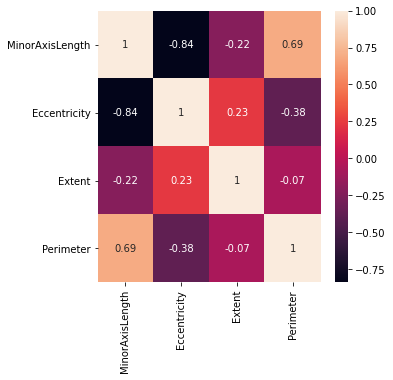

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

Since no two attributes are highly correlated, we wont be removing any other feature further.

## Data Standarziation

In [ ]:
SS = StandardScaler()
data = SS.fit_transform(X)
X = pd.DataFrame(data)
X.columns=['MinorAxisLength', 'Eccentricity', 'Extent', 'Perimeter']
X.describe()

,MinorAxisLength,Eccentricity,Extent,Perimeter
count,1.759700e+04,1.759700e+04,1.759700e+04,1.759700e+04
mean,-4.615467e-16,1.269618e-15,-9.007967e-16,1.791833e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.449896e+00,-1.322254e+00,-1.309310e+00,-2.434857e+00
25%,-9.875160e-01,-8.732976e-01,-7.606527e-01,-7.748236e-01
50%,1.233656e-01,-4.408198e-01,-3.465551e-01,-8.415201e-02
75%,7.319105e-01,8.222901e-01,5.582965e-01,6.435588e-01
max,5.540018e+00,5.673419e+00,3.896043e+00,3.456330e+00


# Classification
## Setting Up
### Importing Modules
We will first import the require modules for classification and calculation.

In [ ]:
# Modules to split the data into train and test sets
from sklearn.model_selection import train_test_split, StratifiedKFold

# Module to calculate the accuracy score on our classifier
from sklearn.metrics import accuracy_score

# Module to find the average of a given list of values
from statistics import mean

# Module to find the square root of a given value
from math import sqrt

### Create StratifiedKFold object
We will use 5x5 fold validation technique for cross validation with stratified sampling for all our classification models.

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

### Function to find pessimistic error on train set
We use the average training accuracies, average lengths of the splittted sets and the parameter to calculate an average of pessimistic error on the training data where we try to give the model a penalty for its complexity. Here, parameter gives the degree of complexity of the model used for finding the pessimistic error. 

In [ ]:
def evaluate_train(accuracy, total, parameter, classes=2):
  train_error=1-accuracy
  pessi_error=train_error+(parameter/classes)/total
  print('Pessimistic error on train set is: %.3f'% pessi_error)

### Function to Evaluate and Calculate True Error on test set
Assuming that our sample is drawn independent of the model and each other and since the number of training examples in all the cases will be *n* greater than 30, we can say that with N% probability, the error of the entire distribution (true error) lies in the interval:

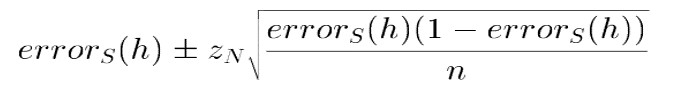

where error<sub>S</sub>(h) is the training error achieved with sample S for our model h, Z<sub>N</sub>=1.64 for N=90 and Z<sub>N</sub>=1.28 for N=80.

So, we use the average test accuracies and average lengths of the splittted sets to calculate an average of true errors on the test data.

In [ ]:
# Model Accuracy, how often is the classifier correct?
def evaluate_test(accuracy, length):
  print("Overall Accuracy over Test Data: %.2f" % (accuracy*100))
  error=1-accuracy
  interval = sqrt( (error * (1 - error)) / length)
  print('True Error with 90 percent confidence is: %.3f'% (error*100),'± %.3f'% (1.64*interval*100))
  print('True Error with 80 percent confidence is: %.3f'% (error*100),'± %.3f'% (1.28*interval*100))

### Our Operational Function
Here we will apply our StratifiedKFold object and return an average of training accuracies, test accuracies, and the lengths of the splittted sets.

In [ ]:
def train_and_evaluate(classifier):
  train_length=[]
  test_length=[]
  test_accuracy = []
  train_accuracy = []

  # Applyting Stratified 5x5Fold cross validation
  for train_index, test_index in skf.split(X, y): 
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
      y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
      classifier.fit(X_train_fold, y_train_fold.values.ravel())
      train_length.append(len(train_index))
      test_length.append(len(test_index))
      test_accuracy.append(classifier.score(X_test_fold, y_test_fold))
      train_accuracy.append(classifier.score(X_train_fold, y_train_fold))

  # Plot of Accuracies of various
  plt.plot(range(0,5),test_accuracy,'bv--')
  plt.legend(['Test Accuracy'])
  plt.xlabel('Test Sample')
  plt.ylabel('Accuracy')
  plt.show()
  
  print('We can see that the test accuracies lie in the range of %.3f' % min(test_accuracy),'to %.3f.'% max(test_accuracy))
  
  return (mean(train_accuracy),mean(test_accuracy),mean(train_length),mean(test_length))

Now, we will perform classification by applying various classification algorithms. And then, we'll estimate how accurately our classifier can predict the type of rice by comparing actual test set values and predicted values during the stratified cross validation process.

## Desision Tree
In this section, we apply ID3- a decision tree classifier to the rice dataset obtained after preprocessing.

In [ ]:
# Importing the Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier

### Identifying the Max depth required
We will split the data as 75% train and 25% test for this purpose.

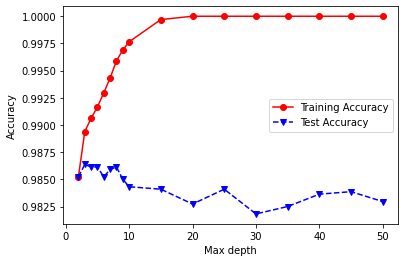

Max test accuracy value is 0.9864 for depth 3.


In [ ]:
# Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Training and Test set creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

max_depth=maxdepths[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

print('Max test accuracy value is %.4f'% max(testAcc),'for depth %d.'% max_depth)

### Operational Phase
Here, we will train the data on our operational function using the max_depth value obtained above and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our Decision Tree classifier.

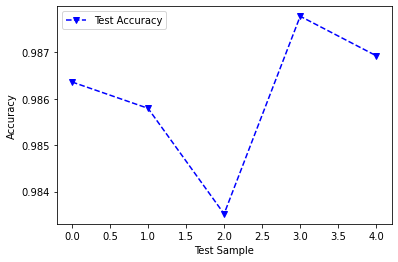

We can see that the test accuracies lie in the range of 0.984 to 0.988.


In [ ]:
# Creating the decesion tree classifier object 
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=max_depth, min_samples_leaf=5)

train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(dt)

### Displaying the generated tree

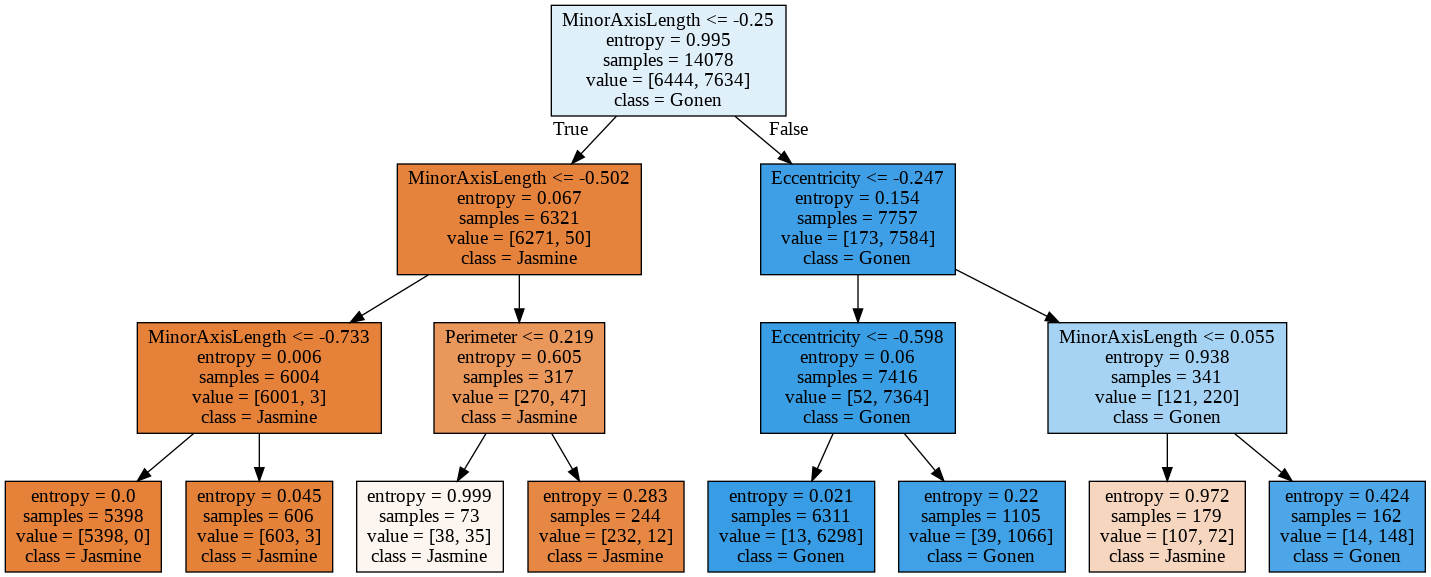

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, feature_names=X.columns, class_names=['Jasmine','Gonen'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Evaluation on Train Set
We can see that the generated tree has 8 leaf nodes. Thus, we use the number of leaf nodes as a measure of our model complexity while finding the pessimistic error.

In [ ]:
evaluate_train(train_accuracy,train_length,8)

Pessimistic error on train set is: 0.013


### Evaluation on Test Set

In [ ]:
evaluate_test(test_accuracy,test_length)

Overall Accuracy over Test Data: 98.61
True Error with 90 percent confidence is: 1.392 ± 0.324
True Error with 80 percent confidence is: 1.392 ± 0.253


## Naive Bayes
Here, we will train the data and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our naive bayes classifier.

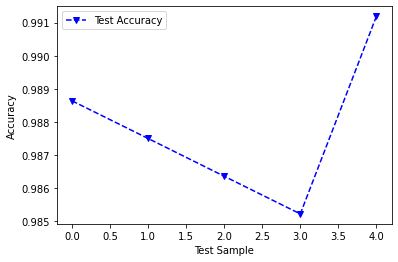

We can see that the test accuracies lie in the range of 0.985 to 0.991.


In [ ]:
# Importing the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Classifier Object
nb = GaussianNB()

# Operational Phase
train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(nb)

### Evaluation on Train Set
In Naive Bayes classification, we assume the events to be independent and thus we write the probabilities of all the attributtes as a multiplication of them individually. Since we have 4 attributes in our preprocessed dataset, we will use that as our parameter for model complexity while finding the pessimistic error.

In [ ]:
evaluate_train(train_accuracy,train_length,X.shape[1])

Pessimistic error on train set is: 0.012


### Evaluation on Test Set

In [ ]:
evaluate_test(test_accuracy,test_length)

Overall Accuracy over Test Data: 98.78
True Error with 90 percent confidence is: 1.222 ± 0.304
True Error with 80 percent confidence is: 1.222 ± 0.237


# Classification with KNN
We will take k=5 for this assignment and use Minkowski distance as our metric.

In [ ]:
# Importing a RIPPER Rule Based Classifier Model
from sklearn.neighbors import KNeighborsClassifier

### Identifying the p value
We will split the data as 75% train and 25% test for this purpose.

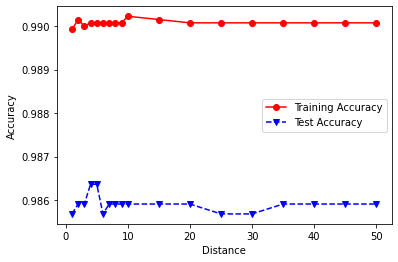

Here, max test accuracy value is 0.9863636363636363 for distance 4


In [ ]:
# Model fitting and evaluation
distances = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Training and Test set creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for distance in distances:
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=distance)
    knn.fit(X_train, y_train.values.ravel())
    y_predTrain = knn.predict(X_train)
    y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

best_distance=distances[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(distances,trainAcc,'ro-',distances,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.show()

print('Here, max test accuracy value is',max(testAcc),'for distance',best_distance)

### Operational Phase
Here, we will train the data on our operational function using the best distance obtained above for our p value and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our KNN classifier.

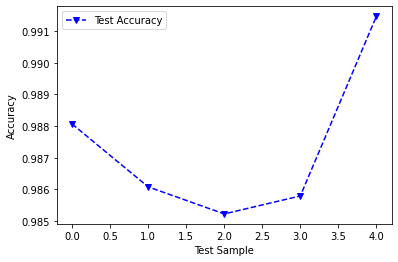

We can see that the test accuracies lie in the range of 0.985 to 0.991.


In [ ]:
# Creating a KNN Classifier Object
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=best_distance)

train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(knn)

### Evaluation on Train Set
Since we are taking k=5 as the number of neighbours to make comparisions for our class label, we will use that as our parameter of model complexity while finding the pessimistic error.

In [ ]:
evaluate_train(train_accuracy,train_length,knn.n_neighbors)

Pessimistic error on train set is: 0.011


### Evaluation on Test Set

In [ ]:
evaluate_test(test_accuracy,test_length)

Overall Accuracy over Test Data: 98.73
True Error with 90 percent confidence is: 1.267 ± 0.309
True Error with 80 percent confidence is: 1.267 ± 0.241


# Rule Based Classification
We will implement this using the RIPPER algorithm
### Installing Module
We will use wittgenstein - a Weka wrapper for Python.

In [ ]:
!pip install wittgenstein

In [ ]:
# Importing a RIPPER Rule Based Classifier Model
from wittgenstein import RIPPER

### Identifying Complexity
We try to find the complexity stopping threshold value. We will split the data as 75% train and 25% test for this purpose.

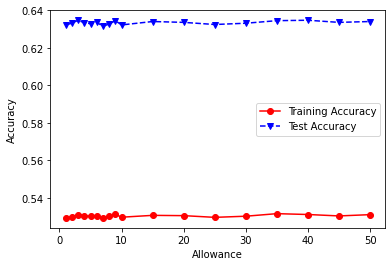

Max test accuracy value is 0.635 for dl_allowance 3.


In [ ]:
# Model fitting and evaluation
allowances = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Training and Test set creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for depth in allowances:
    clf = RIPPER(dl_allowance=depth)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

dl_allowance=allowances[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(allowances,trainAcc,'ro-',allowances,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Allowance')
plt.ylabel('Accuracy')
plt.show()

print('Max test accuracy value is %.3f'% max(testAcc),'for dl_allowance %d.'% dl_allowance)

### Operational Phase
Here, we will train the data on our operational function using the ballowance value obtained above and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our RIPPER classifier, with the positive class defined as Jasmine.

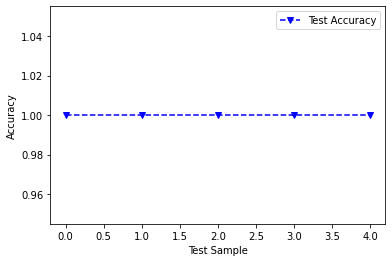

We can see that the test accuracies lie in the range of 1.000 to 1.000.


In [ ]:
# Creating a RIPPER Classifier Obect
rb = RIPPER(dl_allowance=dl_allowance)

train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(rb)

### Displaying the generated rules
We can access our trained model using the clf.ruleset_ attribute. A trained ruleset model represents a list of disjunction of conjunctions -- 'V' represents 'or' and '^' represents 'and'. In other words, the model predicts positive class if any of the inner-nested condition-combinations are all true.

In [ ]:
rb.ruleset_.out_pretty()

[[Eccentricity=-1.32--1.03] V
[Eccentricity=-0.82--0.68] V
[Eccentricity=-1.03--0.92] V
[Eccentricity=-0.92--0.82 ^ Extent=-1.31--1.02] V
[Eccentricity=-0.68--0.45 ^ Perimeter=1.36-3.46] V
[Eccentricity=-0.92--0.82 ^ MinorAxisLength=0.13-0.41] V
[Eccentricity=-0.68--0.45 ^ MinorAxisLength=0.41-0.63] V
[Eccentricity=-0.92--0.82 ^ MinorAxisLength=0.86-1.23] V
[Eccentricity=-0.68--0.45] V
[Eccentricity=-0.92--0.82 ^ Perimeter=-0.08-0.2] V
[Eccentricity=-0.92--0.82] V
[Eccentricity=-0.45-0.35 ^ Perimeter=1.36-3.46] V
[Eccentricity=-0.45-0.35 ^ MinorAxisLength=0.13-0.41] V
[Eccentricity=-0.45-0.35 ^ MinorAxisLength=-0.66-0.13 ^ Extent=-1.02--0.88] V
[Eccentricity=-0.45-0.35 ^ MinorAxisLength=0.41-0.63] V
[Eccentricity=-0.45-0.35 ^ MinorAxisLength=-0.66-0.13 ^ Perimeter=0.2-0.48 ^ Extent=-0.88--0.65] V
[Eccentricity=-0.45-0.35 ^ MinorAxisLength=-0.66-0.13 ^ Perimeter=0.2-0.48 ^ Extent=0.29-0.88]]


In [ ]:
no_rules=len(rb.ruleset_)
print('Number of rules generated by the model:',len(rb.ruleset_))

Number of rules generated by the model: 17


### Evaluation on Train Set
Since the complexity of our Rule based classifier depends on the number of rules that the model will have to check while finding the class label for the test data, we will use the number of rules generated by our ruleset as our parameter for finding the pessimistic error.

In [ ]:
evaluate_train(train_accuracy,train_length,no_rules)

Pessimistic error on train set is: 0.001


### Evaluation on Test Set

In [ ]:
evaluate_test(test_accuracy,test_length)

Overall Accuracy over Test Data: 100.00
True Error with 90 percent confidence is: 0.000 ± 0.000
True Error with 80 percent confidence is: 0.000 ± 0.000


## Comparing Classifiers
Here is a comparison for how our various models compare, scored by accuracy:

| Model | Accuracy Score |
|--------------------------|:------:|
| Rule Based (RIPPER)  | 100.0 |
| (Gaussian) Naive Bayes  | 98.78 |
| 5 Nearest Neighbour  | 98.73 |
| Decision Tree  | 98.61 |

We can see that besides Ripper, all the other models give almost similar accuracy score. So, no definite comparision can be made about them. Ripper gives an expceptionally high score of 100, which means either it has been able to find a perfect set of rules or some missteps led to this.

We can still make a relative comparision on these models based on their accuracy score as: **Rule Based (RIPPER) > Naive Bayes > 5 Nearest Neighbour > Decision Tree**. All these accuracy values are acceptable and thus the models perform well.

Based on their true error scores, we can say that besides RIPPER, Naive Bayes has the least true error for both the considered intervals followed by KNN. Decision Tree has a relatively high true error rate. This point to the same ordering of preference as above.